# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

#### 1. Open the `categoricals` variable we created before.

In [3]:
categoricals = data.select_dtypes(object)
categoricals.head(1)

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize


#### 2. Plot all the categorical variables with the proper plot. What can you see?

In [4]:
def plot_categoricals(data):
    df = data.copy()
    for col in df.columns:
        #df = df.sort_values(by=col, ascending=False)
        sns.histplot(df, x=col)
        plt.show()

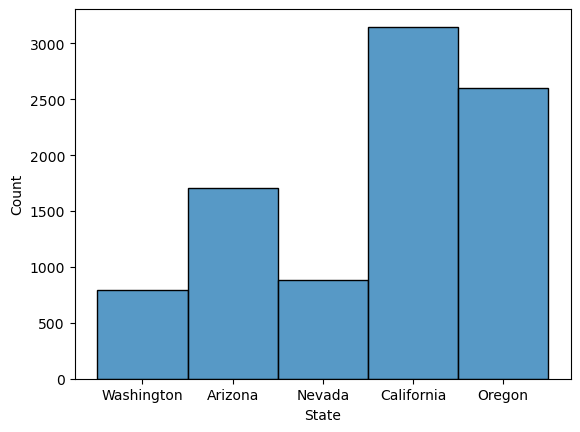

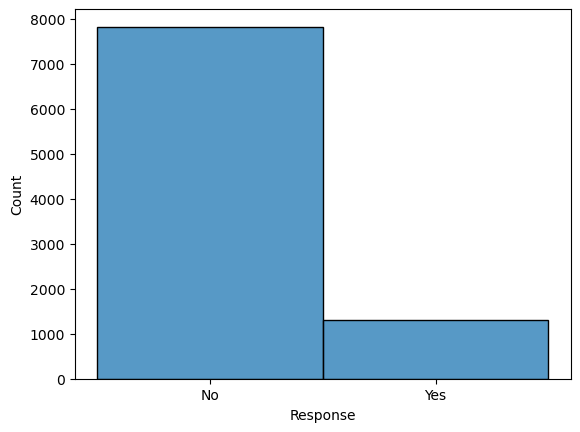

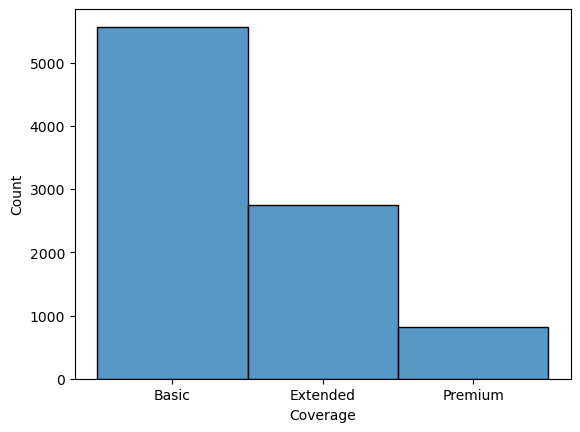

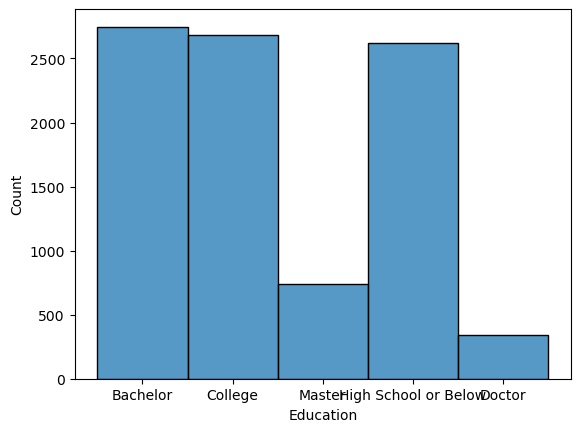

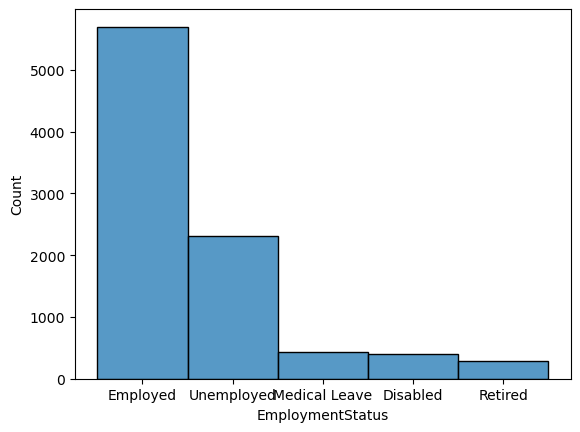

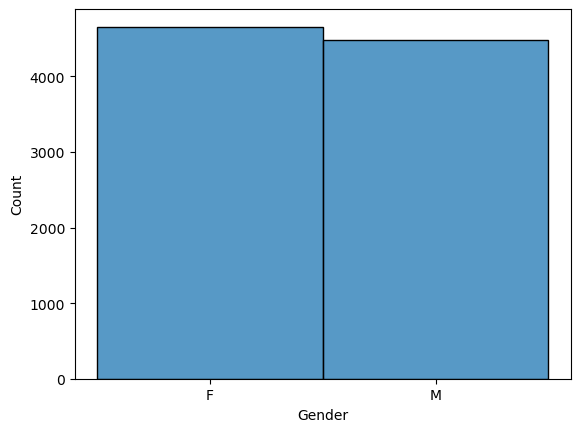

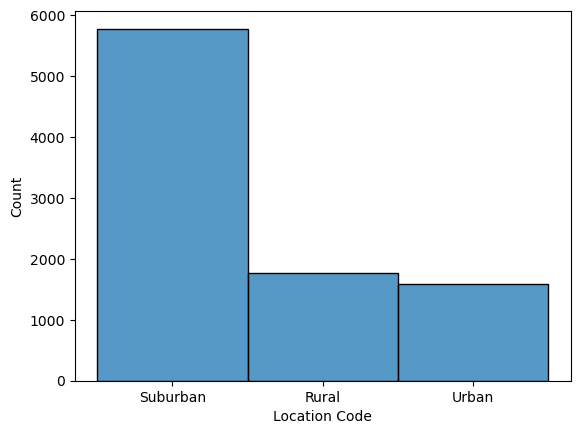

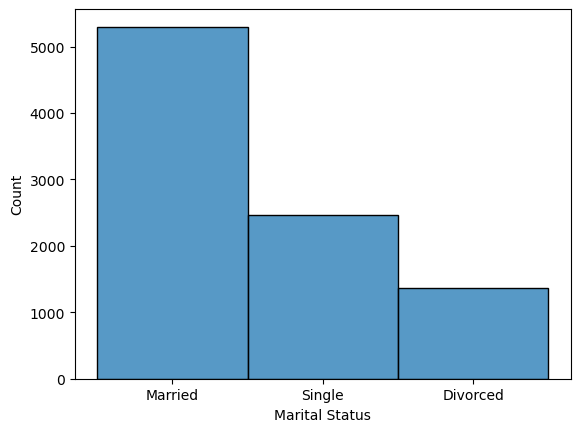

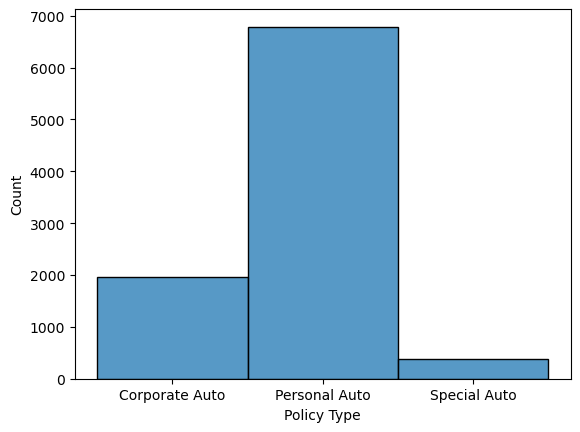

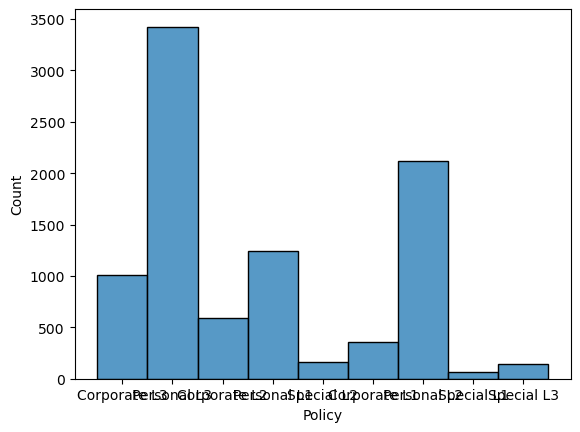

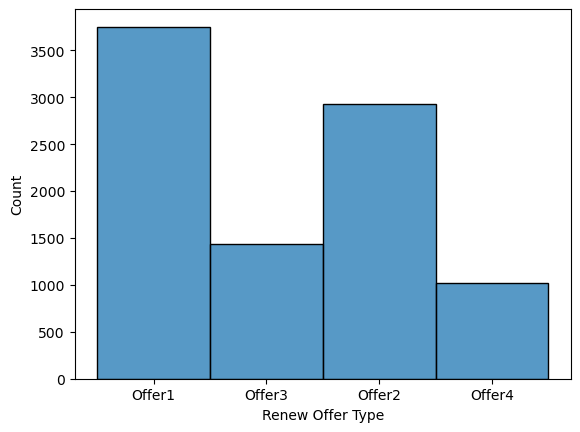

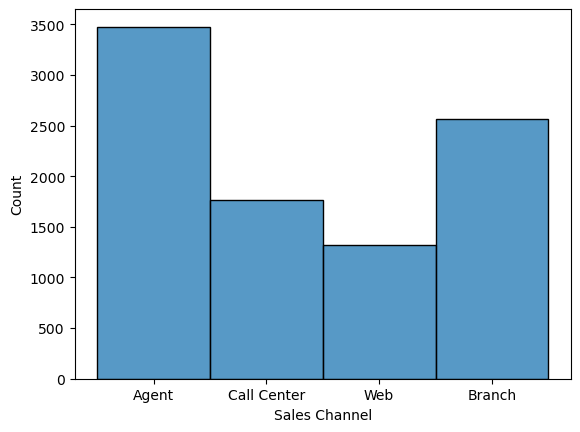

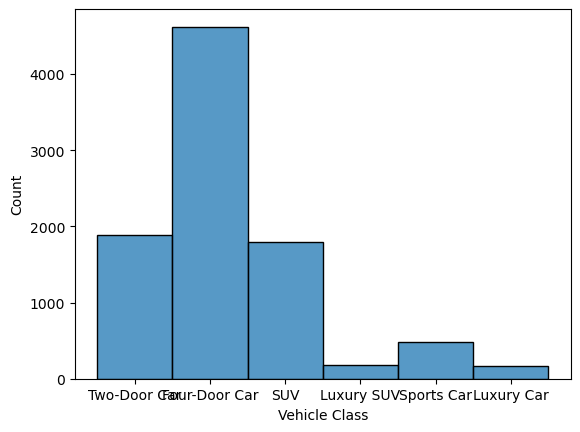

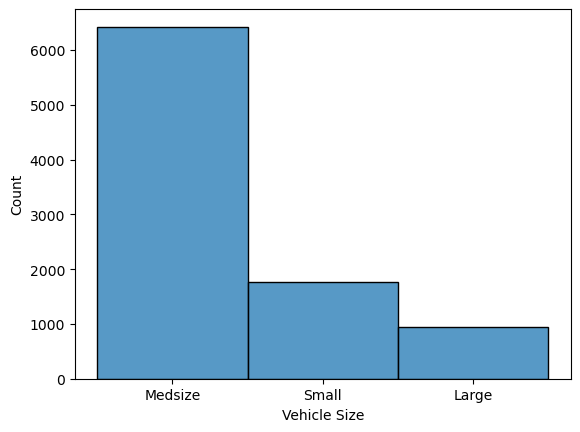

In [5]:
categoricals = categoricals.drop(['Customer', 'Effective To Date'], axis=1)
plot_categoricals(categoricals)

What we can see here is that all categoricals follow some kind of exponential distribution...

#### 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

Seems to be that `Policy` and `Vehicle Size` are redundant. So we might merge `Policy` with `Policy Type` and
`Vehicle Size` with `Vehicle Class`.

#### 4. Plot time variable. Can you extract something from it?

So lets group `Total Claim Amount` by `Effective To Date` and see what the according plot will tell us...

In [19]:
dateplot_df = data[['Effective To Date', 'Total Claim Amount']].copy()
dateplot_df['Effective To Date'] = pd.to_datetime(dateplot_df['Effective To Date'], infer_datetime_format=True)
dateplot_df = dateplot_df.pivot_table(index='Effective To Date').reset_index() #.sort_values(by='Effective To Date')

<AxesSubplot:xlabel='Effective To Date', ylabel='Total Claim Amount'>

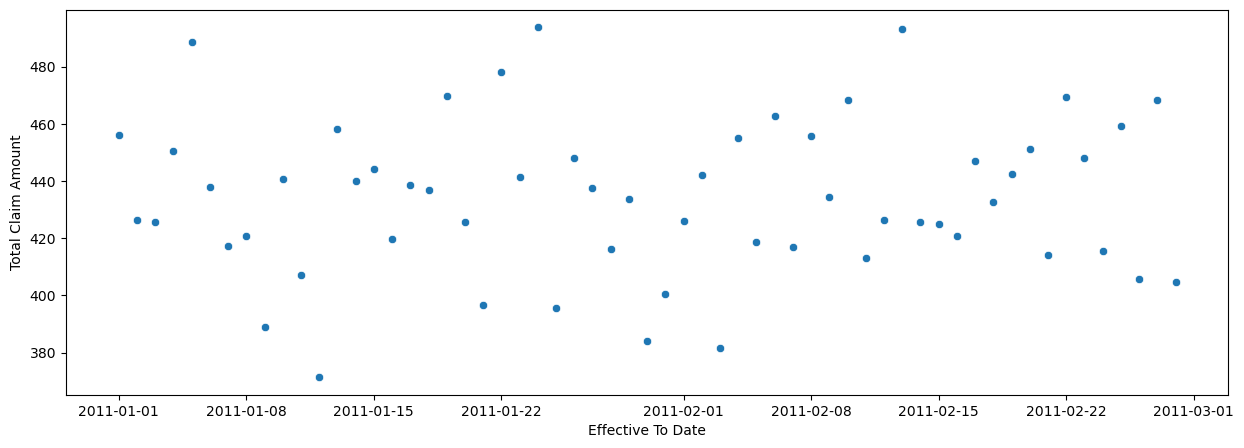

In [20]:
fig,ax = plt.subplots(figsize=(15,5))
sns.scatterplot(y='Total Claim Amount', x='Effective To Date', data=dateplot_df)

<AxesSubplot:xlabel='Effective To Date', ylabel='Total Claim Amount'>

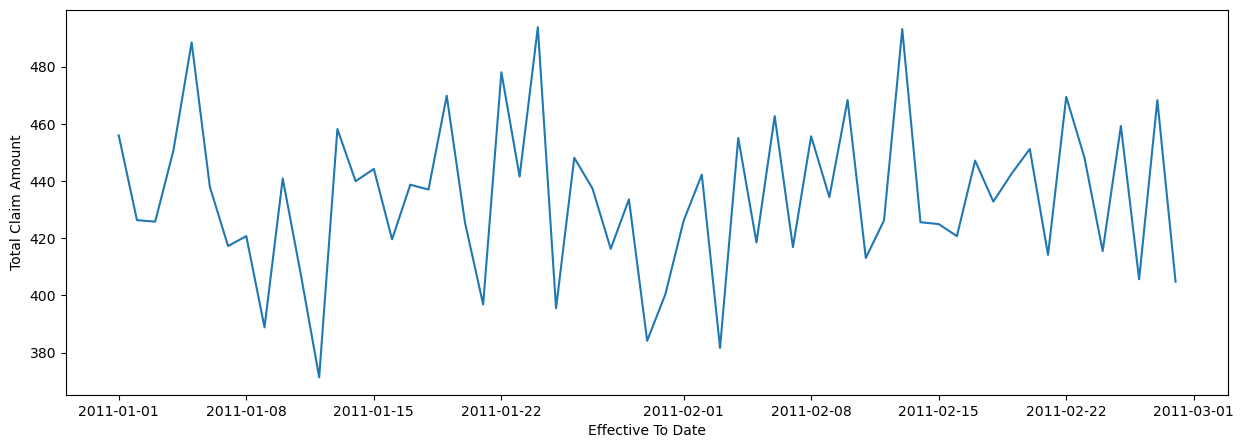

In [22]:
fig,ax = plt.subplots(figsize=(15,5))
sns.lineplot(y='Total Claim Amount', x='Effective To Date', data=dateplot_df)

There is some kind of monthly regularity but without any obvious trends...